<a href="https://colab.research.google.com/github/Tarun280896/Data-Scraping-and-Wrangling/blob/master/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#downloading zip file
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-05-09 14:42:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  77.6MB/s    in 0.8s    

2021-05-09 14:42:09 (77.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [4]:
#sample file names:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.924.jpg', 'cat.727.jpg', 'cat.438.jpg', 'cat.511.jpg', 'cat.971.jpg', 'cat.90.jpg', 'cat.506.jpg', 'cat.433.jpg', 'cat.417.jpg', 'cat.847.jpg']
['dog.328.jpg', 'dog.833.jpg', 'dog.566.jpg', 'dog.720.jpg', 'dog.209.jpg', 'dog.787.jpg', 'dog.712.jpg', 'dog.445.jpg', 'dog.902.jpg', 'dog.954.jpg']


In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [6]:
#ploting images
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

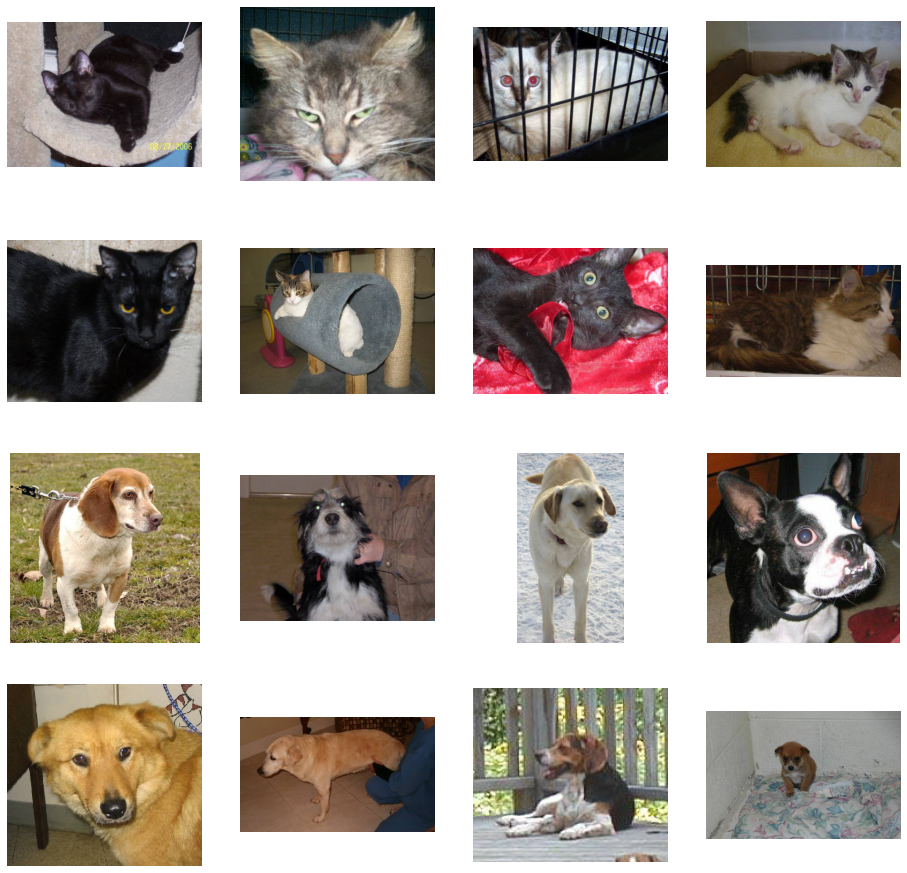

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
from tensorflow import keras

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback

In [10]:
class CustomCallbacks(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.9:
      print("Reached 90 % accuracy")
      self.model.stop_training = True

In [29]:
def get_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (150, 150, 3), activation = 'relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [30]:
#initilizing data generator
train_data_gen = ImageDataGenerator(1/255)
validation_data_gen = ImageDataGenerator(1/255)

In [31]:
train_data = train_data_gen.flow_from_directory(directory= train_dir,
                                                target_size = (150, 150),
                                                class_mode = 'binary',
                                                batch_size = 20
                                                )

validation_data = validation_data_gen.flow_from_directory(directory= validation_dir,
                                                target_size = (150, 150),
                                                class_mode = 'binary',
                                                batch_size = 20
                                                )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
call_backs = CustomCallbacks()
model = get_model()
history = model.fit(train_data, epochs = 15, validation_data = validation_data, callbacks = [call_backs])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
100/100 [==============================] - 9s 86ms/step - loss: 31.2516 - accuracy: 0.5671 - val_loss: 0.6338 - val_accuracy: 0.6570
Epoch 2/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5696 - accuracy: 0.7003 - val_loss: 0.6591 - val_accuracy: 0.6570
Epoch 3/15
100/100 [==============================] - 8s 84ms/step - loss: 0.4645 - accuracy: 0.7701 - val_loss: 0.6477 - val_accuracy: 0.6840
Epoch 4/15
100/100 [==============================] - 8s 84ms/step - loss: 0.3669 - accuracy: 0.8474 - val_loss: 0.7191 - val_accuracy: 0.6680
Epoch 5/15
100/100 [==============================] - 8s 84ms/step - loss: 0.3277 - accuracy: 0.8647 - val_loss: 0.7054 - val_accuracy: 0.6770
Epoch 6/15
100/100 [==============================] - 8s 85ms/step - loss: 0.2327 - accuracy: 0.9130 - val_loss: 0.7849 - val_accuracy: 0.6820
Reached 90 % accuracy


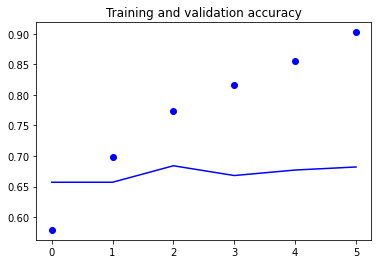

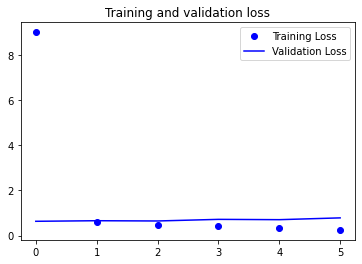

In [33]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using Augmentation

In [51]:
def get_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (150, 150, 3), activation = 'relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(.2))
  model.add(Conv2D(64, (3,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(.2))
  model.add(Conv2D(128, (3,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(.2))
  model.add(Conv2D(128, (3,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(128, (3,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [52]:
#initilizing data generator
train_data_gen = ImageDataGenerator(1/255,
                                    width_shift_range= 0.2,
                                    rotation_range = 40,
                                    height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest',
                                    vertical_flip = 0.2)
validation_data_gen = ImageDataGenerator(1/255,
                                    width_shift_range= 0.2,
                                    rotation_range = 40,
                                    height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest',
                                    vertical_flip = 0.2)

In [53]:
train_data = train_data_gen.flow_from_directory(directory= train_dir,
                                                target_size = (150, 150),
                                                class_mode = 'binary',
                                                batch_size = 20
                                                )

validation_data = validation_data_gen.flow_from_directory(directory= validation_dir,
                                                target_size = (150, 150),
                                                class_mode = 'binary',
                                                batch_size = 20
                                                )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
call_backs = CustomCallbacks()
model = get_model()
history = model.fit(train_data, epochs = 100, validation_data = validation_data, callbacks = [call_backs])

100/100 [==============================] - 21s 215ms/step - loss: 0.6343 - accuracy: 0.6261 - val_loss: 0.6641 - val_accuracy: 0.6270
Epoch 30/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6578 - accuracy: 0.6153 - val_loss: 0.7447 - val_accuracy: 0.5750
Epoch 31/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6392 - accuracy: 0.6312 - val_loss: 0.6264 - val_accuracy: 0.6530
Epoch 32/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6047 - accuracy: 0.6652 - val_loss: 0.6763 - val_accuracy: 0.6110
Epoch 33/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6237 - accuracy: 0.6343 - val_loss: 0.7075 - val_accuracy: 0.5700
Epoch 34/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6392 - accuracy: 0.6272 - val_loss: 0.6431 - val_accuracy: 0.6310
Epoch 35/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6507 - accuracy: 0.6243 - val_loss: 0.6705 - val_a

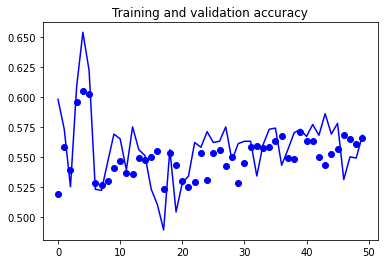

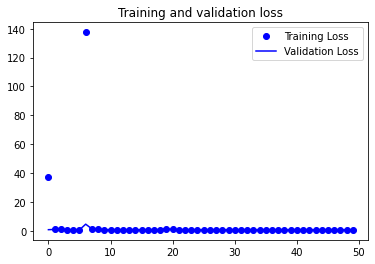

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
# working on sample test data
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving cat-1046544_1920.jpg to cat-1046544_1920 (1).jpg
[0.93536526]
cat-1046544_1920.jpg is a dog


## Visualizing Intermediate Results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


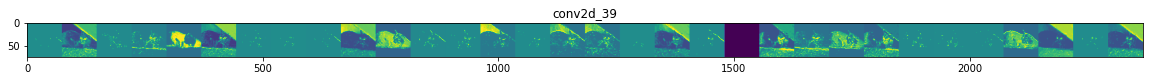

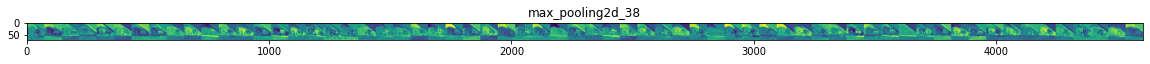

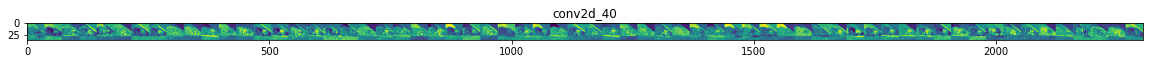

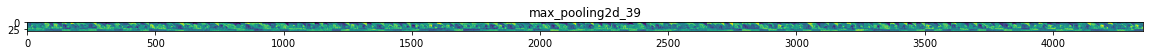

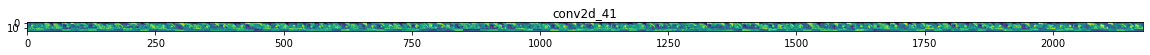

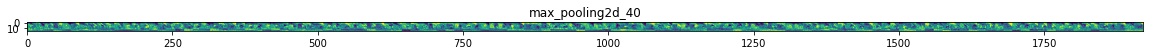

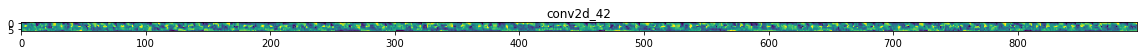

In [63]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

## Evaluating model 

Text(0.5, 1.0, 'Training and validation loss')

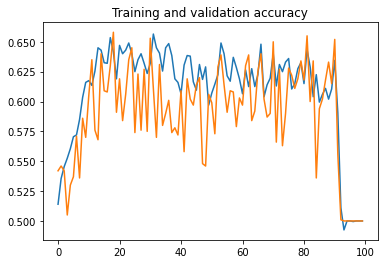

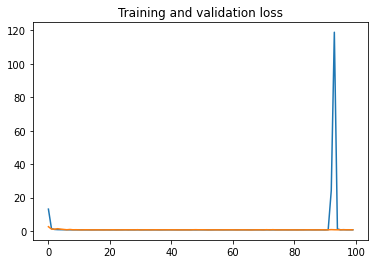

In [55]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )